# Sprawozdanie 1
Analiza i przetwarzanie obrazów <br>
Tomasz Maczek, grupa 3 (piątek 10:30), 2022/2023, WFiIS

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['font.size'] = 16

# Laboratorium 3

**a) Proszę wczytać przykładowy obraz i skonwertować go do skali szarości.**

In [2]:
image = cv2.imread("lab3_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap='gray')
plt.axis('off')

plt.show()

**b) Proszę sprawdzić i porównać wynik progowania ze statycznym ustalonym globalnie
progiem zrealizowanego z użyciem każdego z dostępnych w OpenCV trybu progowania
(cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC,
cv2.THRESH_TOZERO i cv2.THRESH_TOZERO_INV)**

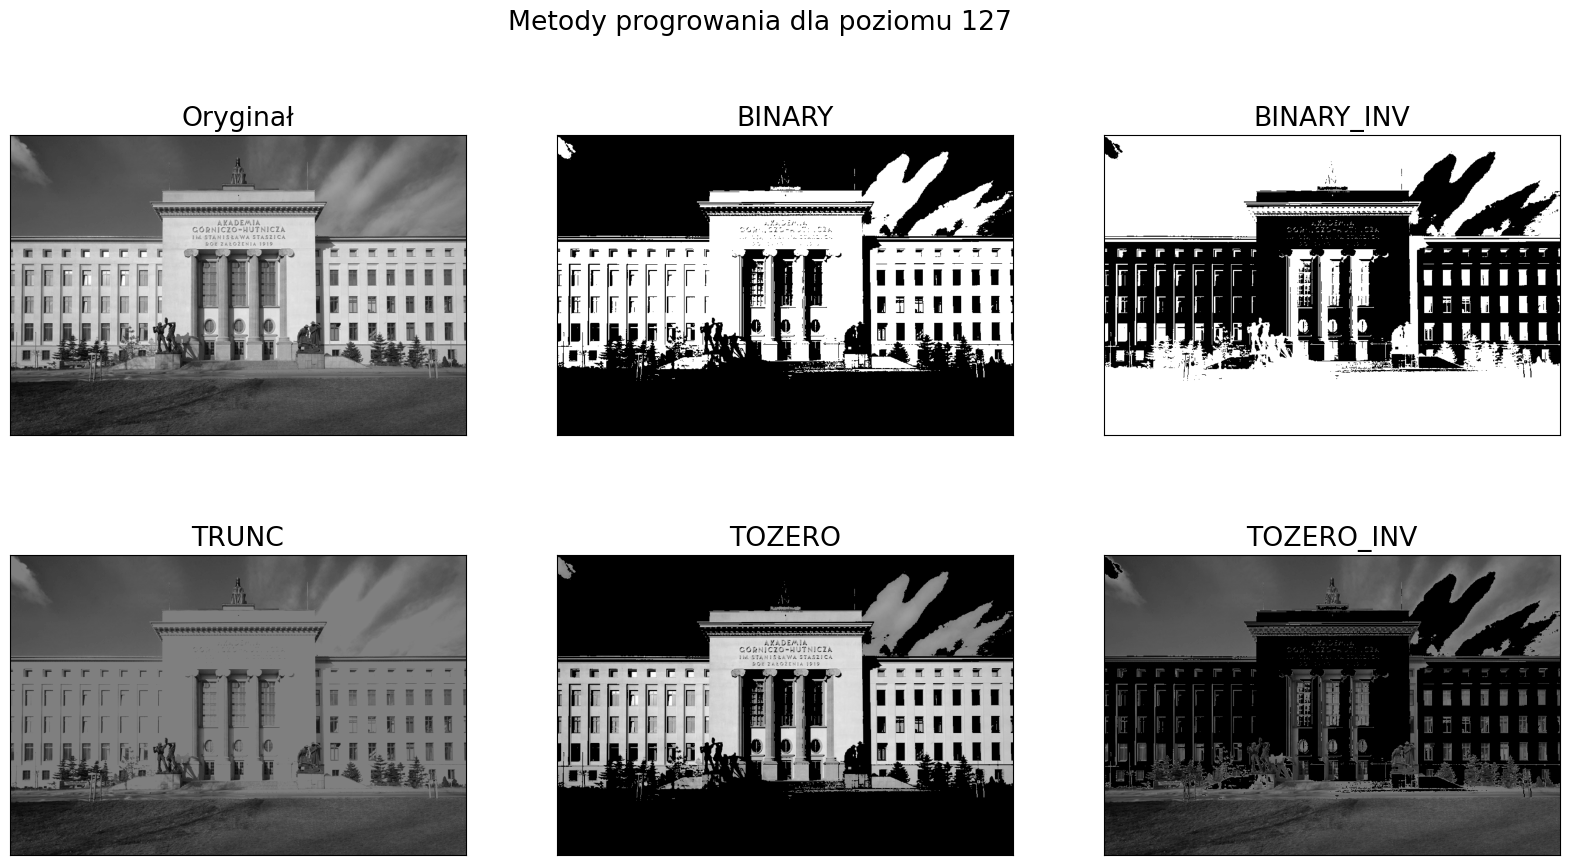

In [3]:
thresh_level = 127
max_level=255

ret, thresh1 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TOZERO_INV)


titles = ['Oryginał','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.suptitle('Metody progrowania dla poziomu ' + str(thresh_level))

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

Progowanie polega na otrzymaniu obrazu czarno-białego lub w skali szarości na podstawie obrazu kolorowego. Dla progowania globalnego ustalany bądź wyznaczany jest jeden próg dla całego obrazu. Poniżej przestawione jest kilka przykładów doboru różnych progów i trybów progowania dla obrazu zawierającego wszystkie odcienie szarości.

In [4]:
def thresholds_comparison(image, thresh_levels):
    max_level=255
    rows = len(thresh_levels)
    cols = 6

    for i in range(rows):
        thresh_level = thresh_levels[i]
        _, thresh1 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_BINARY)
        _, thresh2 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_BINARY_INV)
        _, thresh3 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TRUNC)
        _, thresh4 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TOZERO)
        _, thresh5 = cv2.threshold(image, thresh_level, max_level, cv2.THRESH_TOZERO_INV)


        titles = ['Próg ' + str(thresh_level),'BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
        images = [image, thresh1, thresh2, thresh3, thresh4, thresh5]


        for j in range(cols):
            plt.subplot(rows,cols, i*cols + j+1)
            plt.imshow(images[j],'gray',vmin=0,vmax=255)
            if j==0 or i==0:
                plt.title(titles[j])
            plt.xticks([]),plt.yticks([])

    plt.show()

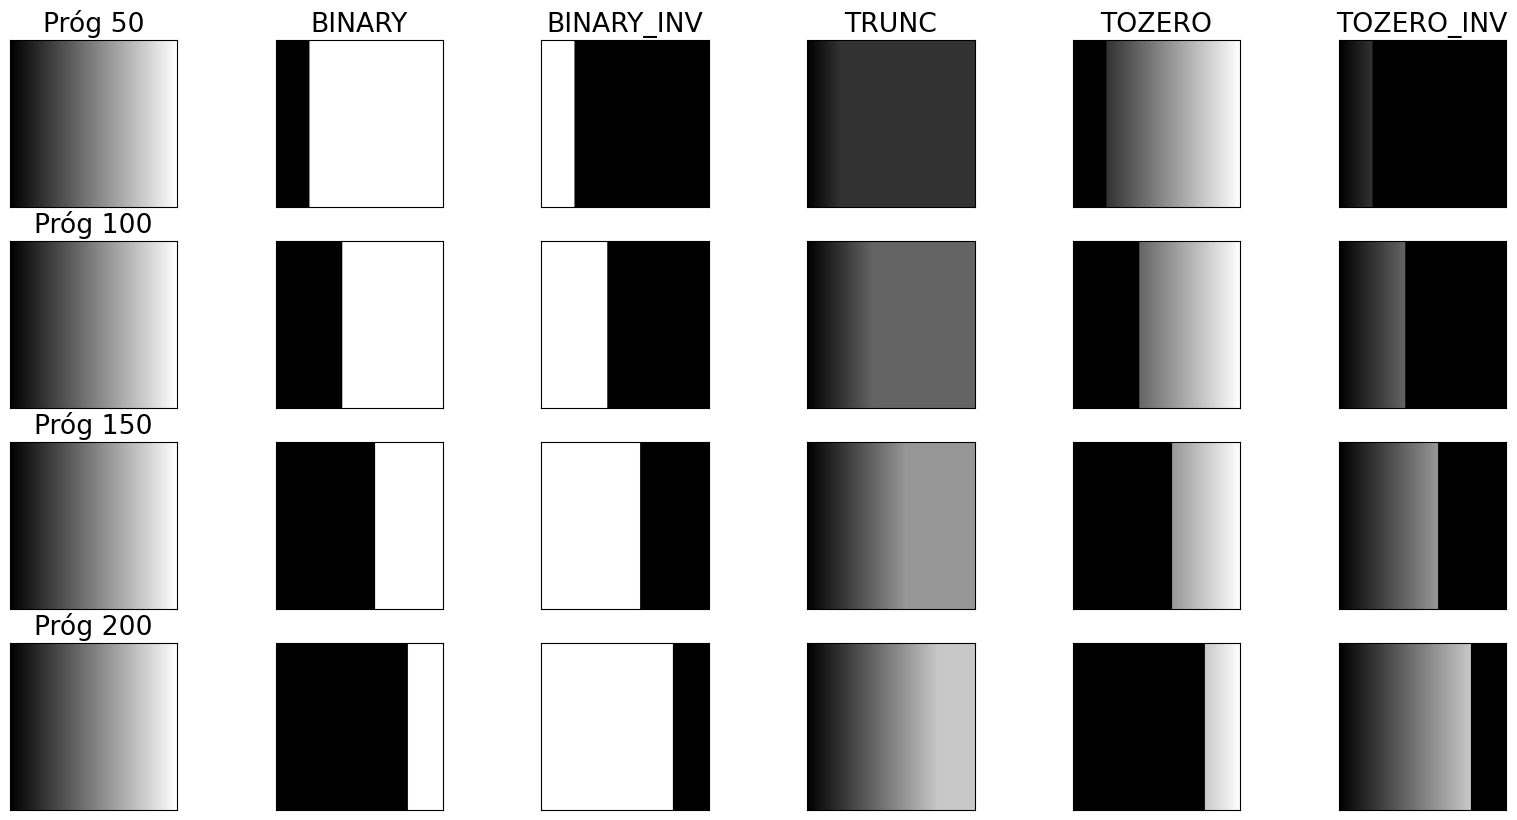

In [5]:
grayscale_ex = np.float32(np.full((256, 256), range(256)))
thresh_levels = [50, 100, 150, 200]

thresholds_comparison(grayscale_ex, thresh_levels)

Progowanie binarne **cv2.THRESH_BINARY** używa następującej formuły: <br>
$$
\mbox{dst(x, y)} = \left\{
    \begin{array}\\
        \mbox{maxval} & \mbox{if } \ \mbox{src(x, y)}  >  \mbox{thresh} \\
        0 & \mbox{otherwise} \\
    \end{array}
\right.
$$
gdzie thresh to zadany próg, a maxval w naszym wypadku 255 (maksymalna wartość odcienia szarości). Wszystko co ma wartość poniżej progu będzie czarne, wartości powyżej będą białe. **cv2.THRESH_BINARY_INV** działa natomiast odwrotnie - wszystko powyżej progu będzie teraz 0, wszystko poniżej - maxval. Obie te metody redukują ilość odcieni do dwóch. <br>

Działanie **cv2.THRESH_TRUNC** jest następujące:
$$
\mbox{dst(x, y)} = \left\{
    \begin{array}\\
        \mbox{threshold} & \mbox{if } \ \mbox{src(x, y)}  >  \mbox{thresh} \\
        \mbox{src(x, y)} & \mbox{otherwise} \\
    \end{array}
\right.
$$

Wszystko poniżej progu zostanie w oryginalnym odcieniu, wszystko powyżej progu będzie miało wartość tego progu. Dla tej metody nie mamy już tylko dwóch odcieni, jak również nie obserwujemy nagłej granicy przy 'płynnym' przechodzeniu barw jak w innych trybach. Na obrazie będą odcienie o wartościach z przedziału [0, thresh]. <br>

Progowanie **cv2.THRESH_TOZERO** jest opisane:
$$
\mbox{dst(x, y)} = \left\{
    \begin{array}\\
        \mbox{src(x, y)} & \mbox{if } \ \mbox{src(x, y)}  >  \mbox{thresh} \\
        0 & \mbox{otherwise} \\
    \end{array}
\right.
$$

W tym wypadku wszystko poniżej progu zostanie zmienione na 0, wszystko powyżej zostanie jak w oryginale. Dla trybu **cv2.THRESH_TOZERO_INV** wartości przed warunkami zostają zamienione - wszystko powyżej progu będzie 0, wszystko poniżej zostanie jak w oryginale. W tych trybach również mamy większą ilość odcieni niż w binary, jednak widzimy przy granicy progu nagłą zmianę odcienia na czarny. Może to się okazać problemem przy progowaniu obrazu, na którym odcienie szarości przechodzą dość płynnie jeden w drugi, bez wielu wyraźnych granic. <br>
Poniżej porównanie dobrania różnych wartości progu do obrazu rozpatrywanego na laboratoriach.

In [6]:
thresholds_comparison(image, thresh_levels)

**c) Proszę zastosować metody adaptacyjnego doboru progu. Jaki wpływ na wynik ma rozmiar
sąsiedztwa? Która z metod daje lepsze rezultaty?**

In [7]:
methods = [cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C]
methods_labels = ['Mean', 'Gaussian']

block_sizes = [11, 41, 71, 101] # nieparzyste -> piksel musi wyladowac w srodku
cols = len(block_sizes)
rows = len(methods)

for i in range(rows):
    method = methods[i]
    label = methods_labels[i]
    for j in range(cols):
        size = block_sizes[j]
        thresh_adp = cv2.adaptiveThreshold(image, 255, method, cv2.THRESH_BINARY, blockSize=size, C=10)
        plt.subplot(rows, cols, i * cols + j + 1)
        plt.imshow(thresh_adp, cmap='gray', vmin=0, vmax=255)
        plt.xticks([])
        plt.yticks([])
        plt.title(label + ', block size = ' + str(size))

plt.suptitle('Porównanie metod adaptacyjnego doboru progu')
plt.tight_layout()
plt.show()
    

Adaptacyjny dobór polega na obliczeniu progu dla piksela bazując na jego otoczeniu. Rozmiar otoczenia podajemy w argumencie **blockSize**, ważne żeby był on nieparzysty - rozpatrywany piksel musi być dokładnie w środku kwadratu o boku wartości blockSize. <br>

Parametr **adaptiveMetod** decyduje jak zostanie obliczony próg:
- **cv.ADAPTIVE_THRESH_MEAN_C** - próg to średnia z obszaru sąsiadującego minus parametr **C**
- **cv.ADAPTIVE_THRESH_GAUSSIAN_C** - próg to średnia gaussowsko ważona minus parametr **C**

gdzie **C** to ostatni argument funkcji. 


Dla rozważanego obrazu otrzymujemy obraz, na którym widzimy 'kontury' elementów. Grubość tych konturów zależy od dobranej wartości rozmiaru bloku. Dla mniejszych wartości bloku(blockSize=11) w obrazie powyżej obserwujemy dobrze odwzorowane kontury elementów obrazu. Dla większych wartości rozmiaru bloku kontury będą grubsze dla elementów, które były widoczne przy mniejszym rozmiarze, część szczegółów zostanie jednak utracona (tutaj: wnętrza okien). <br>

Wybór sposobu liczenia progu jest również istotny: dla średniej ważonej kontury będą cieńsze niż przy zwykłej średniej przy tym samym rozmiarze bloku. Przez mniejszą wagę obiektów na brzegu bloku unikamy też bardzo wyraźnego pojawienia się 'czarnych chmur' jak w pierwszym wierszu. Można więc uznać metodę średniej ważonej za lepszą w tym przypadku.


**d) Proszę zastosować metodę Otsu, wykreślić histogram obrazu i zlokalizować na nim
uzyskaną wartość progu.**

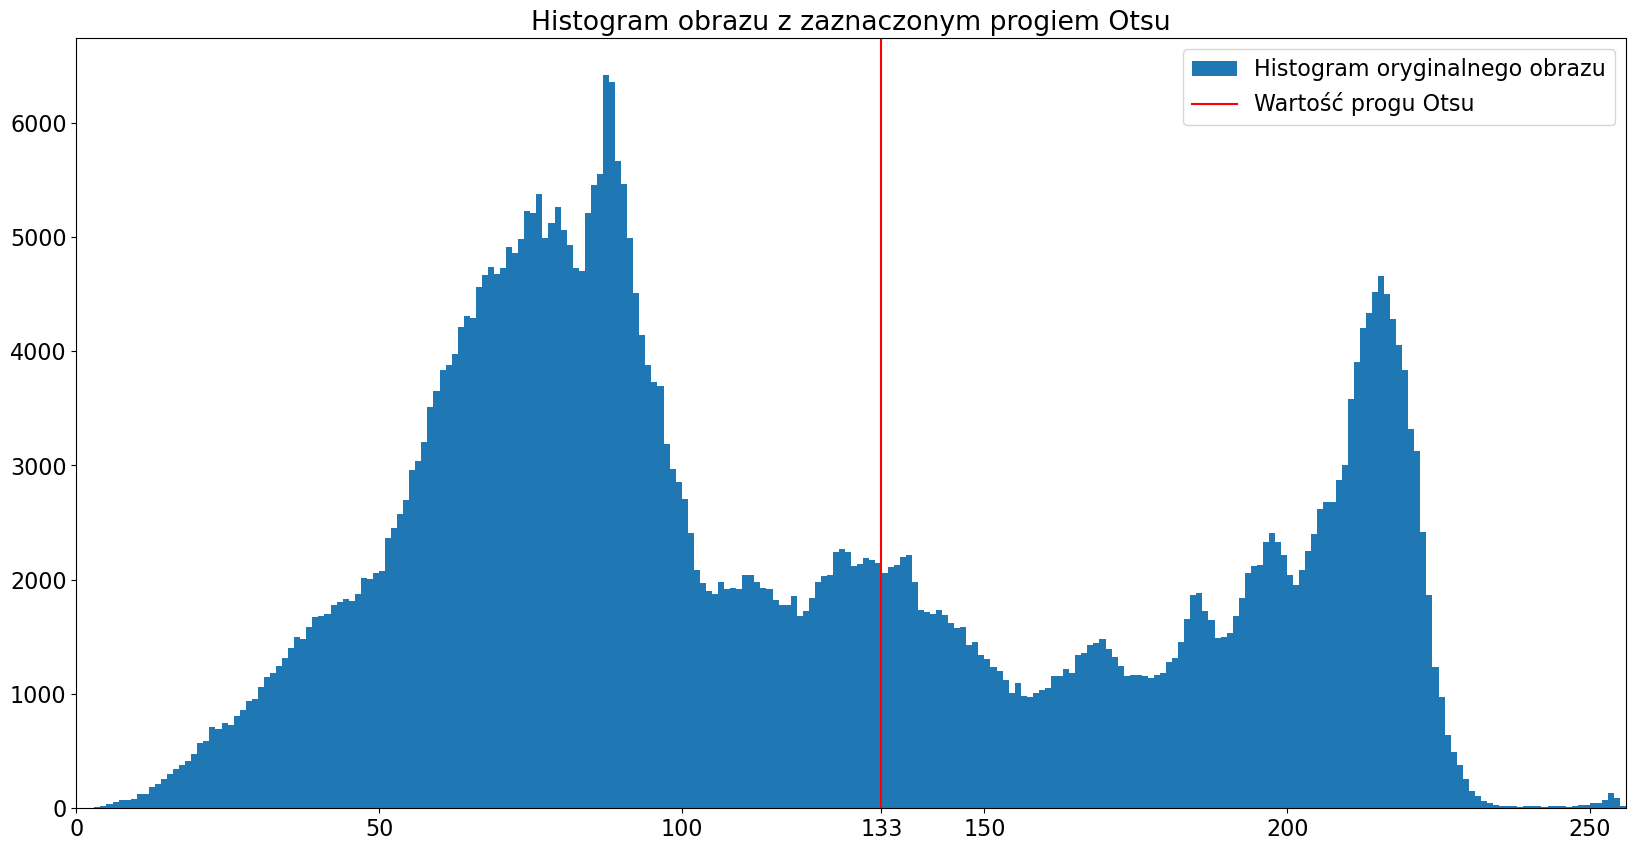

In [8]:
otsu_thresh_val,otsu = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.title('Obraz po zastosowaniu progowania metodą Otsu')
plt.xticks([])
plt.yticks([])
plt.show()


plt.hist(image.flatten(), 256, [0, 256], label='Histogram oryginalnego obrazu')
plt.axvline(x = otsu_thresh_val, label='Wartość progu Otsu', color='red')
plt.xticks(list(plt.xticks()[0]) + [otsu_thresh_val])
plt.xlim([0, 256])
plt.title('Histogram obrazu z zaznaczonym progiem Otsu')

plt.legend()
plt.show()


Metoda Otsu dokonuje progowania globalnego, przy oblicza ona wartość progu (wartość przekazana w argumencie cv2.threshold zostanie zignorowana). Oblicza ona najoptymalniejszy próg dla obrazu na podstawie jego histogramu. Najlepiej działa gdy histogram ma dwa piki (tak jak w naszym wypadku), wtedy wartość progu będzie gdzieś między nimi. Podzieli go wtedy na pierwszy plan i tło.

**e) Proszę wczytać drugi z obrazów i dokonać jego segmentacji z użyciem algorytmu kśrednich na 2, 4, 8 klastrów. Proszę zweryfikować wizualnie wynik klasteryzacji (kolor
każdego piksela to kolor środka klastra do którego go przypisaliśmy) i sprawdzić czy
kolory odpowiadają jakimś cechom zdjęcia które analizujemy.**

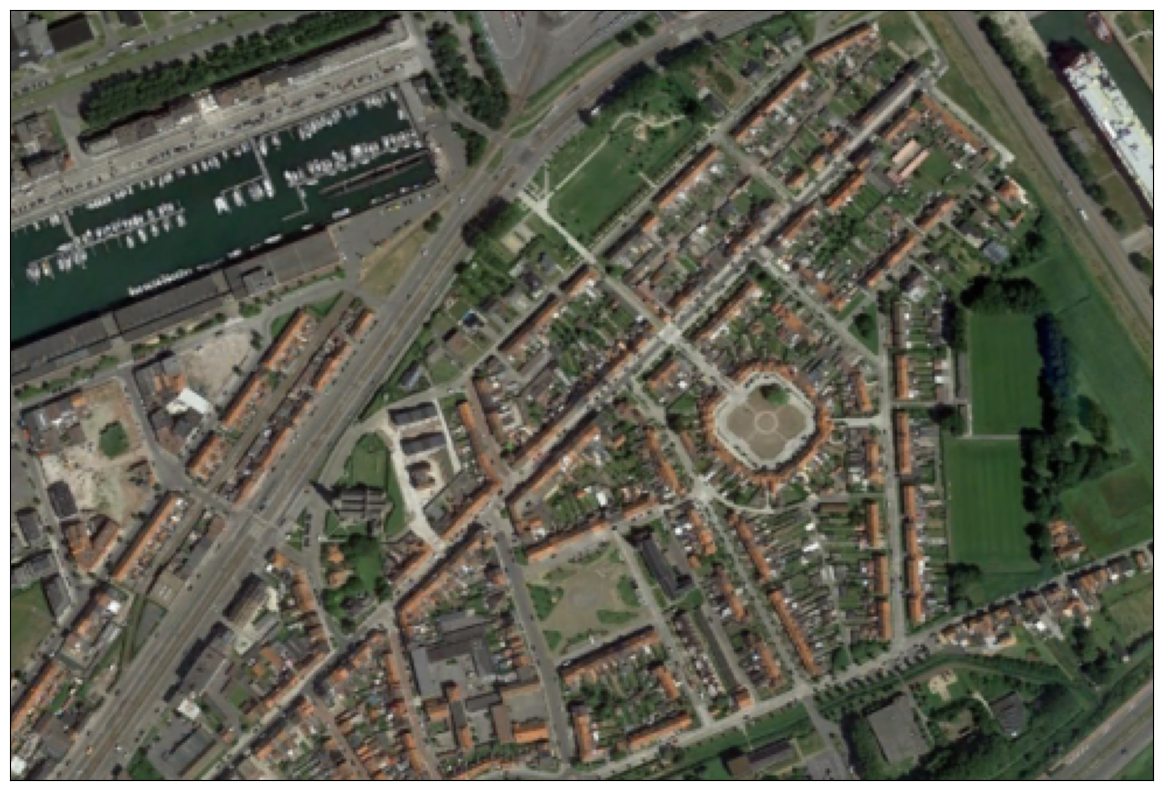

In [9]:
image2 = cv2.imread("lab3_2.png")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.imshow(image2)
plt.xticks([])
plt.yticks([])

plt.show()

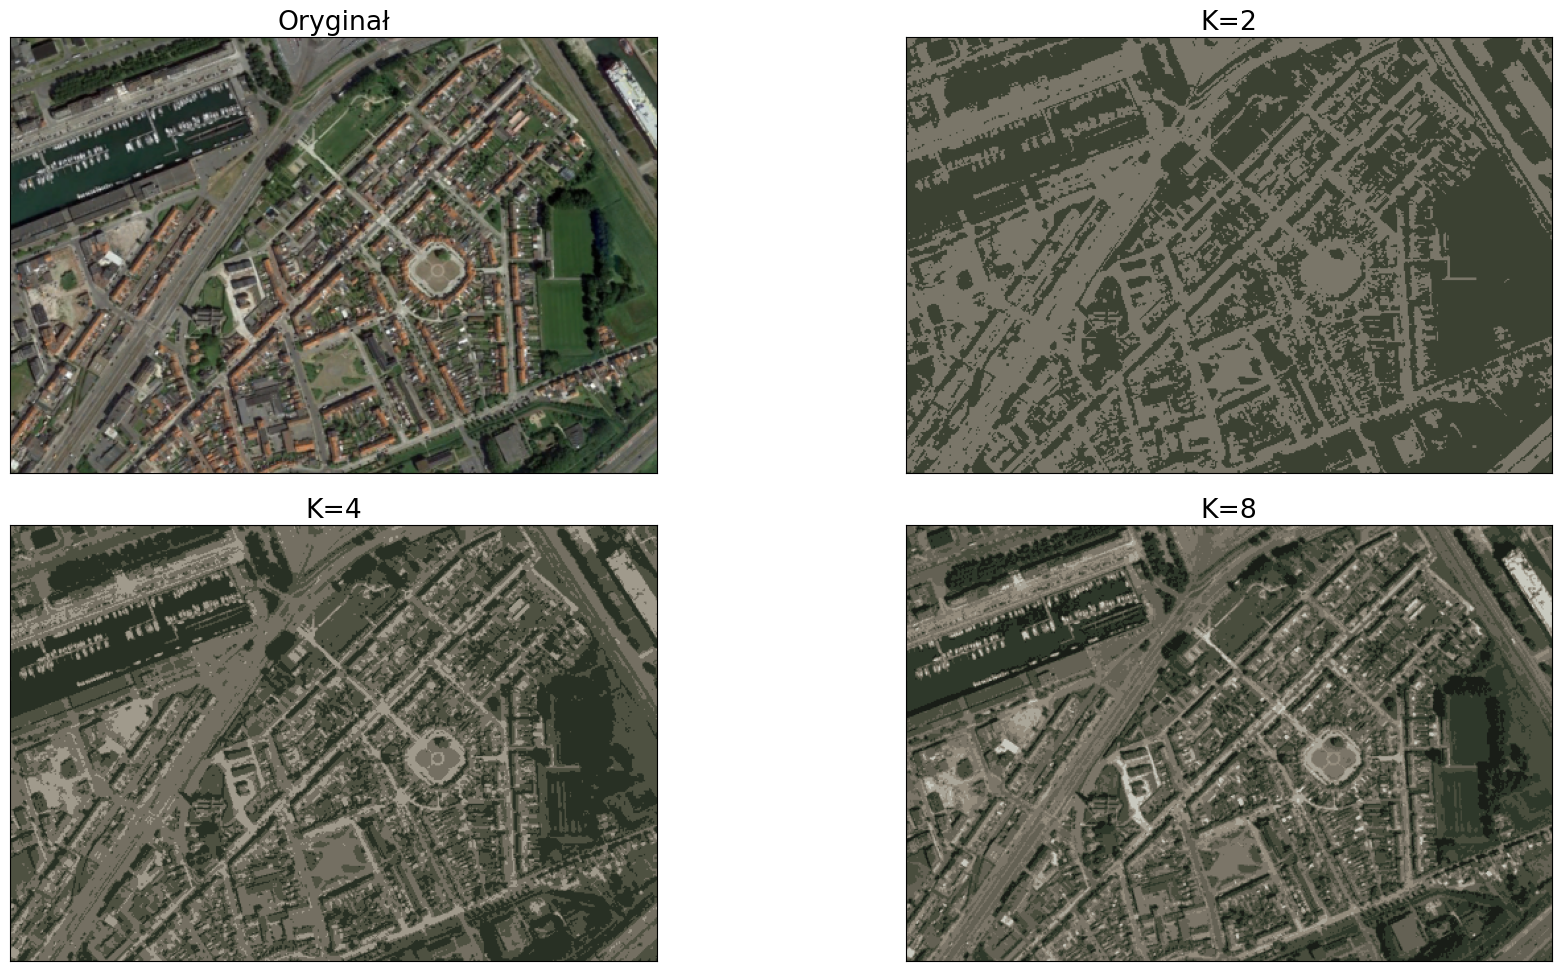

In [10]:
Z = image2.reshape((-1, 3))
Z = np.float32(Z)

Ks = [2, 4, 8]
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)

plt.subplot(2, 2, 1)
plt.imshow(image2)
plt.xticks([]),plt.yticks([])
plt.title("Oryginał")
    
i = 2
for K in Ks:
    ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image2.shape))

    plt.subplot(2, 2, i)
    i = i+1
    plt.imshow(res2)
    plt.xticks([]),plt.yticks([])
    plt.title("K=" + str(K))

plt.tight_layout()
plt.show()

W tym podpunkcie chcemy zrealizować kwantyzację kolorów - stosowana by ograniczyć ilość kolorów w obrazie (np. by zredukować pamięć lub dostosować obraz do urządzeń nie wyświetlających wszystkich barw). Użyta została do tego celu funkcja **cv2.kmeans()** - znajduje ona centra **K** klastrów zadanych w argumencie i grupuje próbki wokół nich. <br>
Aby wykonać to zadanie:
- wczytujemy obraz RGB i zmieniamy jego kształt z pomocą reshape i konwertujemy na typ float32
- definiujemy kryteria zatrzymania działania: **cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER** oznacza, że algorytm zatrzyma działanie gdy jeden z warunków - otrzymamy zadaną dokładność lub osiągniemy maksymalną liczbę iteracji - zostanie spełniony. Argumenty te są podane jako następne (aczkolwiek w kolejności max_iter, epsilon).
- wywołujemy funkcję **cv2.kmeans()** z kolejnymi argumentami: reshape'owany obraz **Z**, ilość klastrów **K**, tablica bestLabels (tutaj None), kryteria, ilość prób wykonania algorytmu (zwrócona zostanie ta z najlepszym wynikiem) oraz flagi opisujące dobór początkowych centrów klastrów - tutaj losowo.
- reshape'ujemy otrzymane wyniki by móc je wyświetlić. <br>
<br>

Przeanalizujmy otrzymane wyniki: dla K=2 widzimy jedynie ogólny zarys ulic i okolicy z lotu ptaka. Dwa kolory, które są na obrazie są podobne do koloru dróg oraz wnętrza obiektu w lewym górnym rogu. Utraciliśmy widoczność niektórych obiektów, jak grupa drzew na polu z prawej strony <br>
Dla K=4 widzimy już więcej szczegółów - kształt w okrągłym obiekcie w środku miasta, większe rozróżnienie między budynkami. Jednak nie jest to jeszcze znaczna ilość. Jeden z nowych odcieni jest bliski dominującemu kolorowi obiektu w prawym górnym rogu. <br>
Dopiero dla K=8 rozróżniamy duża ilość szczegółów - grupa drzew po prawej stronie, detale na drodze, jaśniejsze budynki. Porównując do oryginału kolorystyka jest znacznie bardziej stonowana - nie mamy wyraźnej zieleni trawy czy jasnych akcentów z budynków.


**f) Proszę samodzielnie zaimplementować metodę Otsu. Czy otrzymany próg różni się od
bibliotecznej implementacji? Jeśli tak to dlaczego?**

In [11]:
# np.seterr(divide='ignore', invalid='ignore')
p = cv2.calcHist([image], [0],mask=None,  histSize=[256], ranges=[0, 256])

max_k = 0
max_sigma = 0.0

N = sum(p)
p = p/N

mu_T = sum(i * p[i] for i in range(0, 256)) 

for k in range(0, 256):
    omega_k = sum(p[i] for i in range(0, k+1))
    mu_k = sum(i*p[i] for i in range(0, k+1))
    sig_B = ((mu_T * omega_k - mu_k)**2 ) /( omega_k * (1.0 - omega_k))
    if sig_B > max_sigma:
        max_sigma = sig_B
        max_k = k
        
print ('Poziom progrowania Otsu wyliczony własną implementacją: ' + str(max_k))
print('Poziom progrowania Otsu liczony metodą biblioteczną: ' + str(otsu_thresh_val))


C:\Users\tomek\AppData\Local\Temp\ipykernel_4004\485090142.py:15: RuntimeWarning: invalid value encountered in divide
  sig_B = ((mu_T * omega_k - mu_k)**2 ) /( omega_k * (1.0 - omega_k))


Poziom progrowania Otsu wyliczony własną implementacją: 133
Poziom progrowania Otsu liczony metodą biblioteczną: 133.0


Wersja metody Otsu zaimplementowana tutaj szuka maksimum funkcji:  <br>

$$
  \sigma_{B}^{2}(k) = \frac{[\mu_{T}\cdot \omega(k) - \mu(k)]^{2}}{\omega(k) \cdot [1 - \omega(k)]}
$$

po wartościach **k** należących do przedziału [0, 255] - wartoście odcieni szarości. Parametry we wzorze są obliczane następująco: 

$$
\omega(k) = \sum_{i = 0}^{k} p_{i}
$$

$$
\mu(k) = \sum_{i = 0}^{k}i\cdot p_{i}
$$

$$
\mu_{T} = \mu(L) = \sum_{i = 0}^{L}i\cdot p_{i}
$$

gdzie **L** to maksymalny poziom szarości (tutaj 255), **$p_{i}$** to wartość histogramu dla poziomu szarości **i**. Histogram został wcześniej znormalizowany, więc współczynniki $p_{i}$ sumują się do jedynki. Znaleziony próg jest taki sam jak dla użytej metody bibliotecznej.